In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()
os.chdir('D:\Anupam_Technical\Coursera\Anupam_ANG_ML\AndrewNG_ML_Exercises\ex1\data')
print(current_dir)
inputDF = pd.read_csv('ex1data1.txt', sep=',', header=None, names=['Population','Profit'])
inputDF.head()

D:\Anupam_Technical\Coursera\Anupam_ANG_ML\AndrewNG_ML_Exercises\ex1\data


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


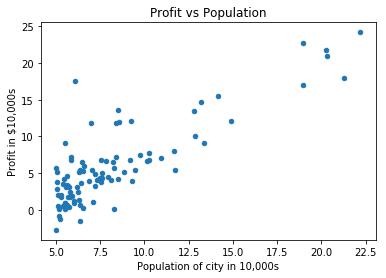

In [11]:
# do an EDA by plotting the data
inputDF.plot(kind='scatter', x='Population', y='Profit')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title("Profit vs Population")
plt.show()

In [81]:
# the feature matrix X
X = inputDF.iloc[:, 0:1].values
one_vector = np.ones(len(X)).reshape(len(X), 1)
X = np.concatenate((one_vector, X), axis=1)
# the vector y
y = inputDF.iloc[:, 1:2].values
m = len(X)

In [65]:
# the vectorized cost function
def compute_cost(X, theta, y):
    J = 0            
    J = np.dot(np.transpose((np.dot(X, theta) - y)), (np.dot(X, theta) - y))
    return J[0][0] / (2 * m)      
    
# now initialize theta with all zeros
theta = np.zeros(2).reshape(2,1)
initial_cost = compute_cost(X, theta, y)
print("cost with theta values set to {} : {}".format(theta, initial_cost))
theta2 = np.array([[-1],[2]])
initial_cost2 = compute_cost(X, theta2, y)
print("cost with theta values set to {} : {}".format(theta2, initial_cost2))


cost with theta values set to [[0.]
 [0.]] : 32.07273387745567
cost with theta values set to [[-1]
 [ 2]] : 54.24245508201238


In [80]:
# the gradient descent (vectorized version)
# alpha = learning rate
# m = no. of training examples
# theta = theta - (alpha / m) * [Xtranspose * (X.theta - y)]

def gradient_descent(X, y, theta, alpha, no_iters):
    J_history = np.zeros((no_iters, 1))
    for iteration in range(no_iters):
        J_history[iteration] = compute_cost(X, theta, y)        
        h = np.dot(X, theta)        
        err = h - y
        theta_err = alpha * (np.dot(np.transpose(X), err) / m)
        theta = theta - theta_err
    return theta   

# initialize the learning rate and no of iterations for gradient descent
alpha = 0.01
no_iters = 1500
print('Running gradient descent on training dataset')
result_theta = gradient_descent(X, y, theta, alpha, no_iters)
print("Theta found by gradient descent:\n {}".format(result_theta))
print("Expected theta value:\n-3.6303\n1.1664\n")

Running gradient descent on training dataset
Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]
Expected theta value:
-3.6303
1.1664



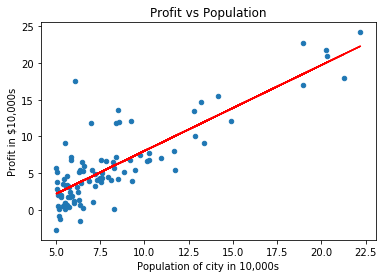

In [85]:
# plot the linear fit
inputDF.plot(kind='scatter', x='Population', y='Profit')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title("Profit vs Population")
predicted_profit = np.dot(X, result_theta)
population = X[:, 1]
plt.plot(population, predicted_profit, color = 'red')
plt.show()

In [94]:
# Make predictions
population1 = np.array([[1, 3.5]])
prediction1 = np.dot(population1, result_theta)
print("For population of 35000 the predicted profit is: {}$".format(prediction1[0,0] * 1000))
population2 = np.array([[1, 7]])
prediction1 = np.dot(population2, result_theta)
print("For population of 70000 the predicted profit is: {}$".format(prediction1[0,0] * 1000))

For population of 35000 the predicted profit is: 451.9767867701767$
For population of 70000 the predicted profit is: 4534.245012944714$
